In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/ODI_Match_Data.csv')

In [ ]:
# Previewing data
df1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [ ]:
df1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

Modifying Attributes

In [ ]:
df = df1[["match_id","ball","batting_team","bowling_team","striker","bowler","runs_off_bat","wicket_type","player_dismissed"]].copy()

In [ ]:
df.shape

(1265103, 9)

In [ ]:
df.isna().sum()

match_id                  0
ball                      0
batting_team              0
bowling_team              0
striker                   0
bowler                    0
runs_off_bat              0
wicket_type         1230629
player_dismissed    1230629
dtype: int64

In [ ]:
df

,match_id,ball,batting_team,bowling_team,striker,bowler,runs_off_bat,wicket_type,player_dismissed
0,1389389,0.1,India,Australia,RD Gaikwad,SH Johnson,4,NaN,NaN
1,1389389,0.2,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN
2,1389389,0.3,India,Australia,RD Gaikwad,SH Johnson,4,NaN,NaN
3,1389389,0.4,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN
4,1389389,0.5,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1265098,64814,42.6,India,New Zealand,J Srinath,PA Hitchcock,0,NaN,NaN
1265099,64814,43.1,India,New Zealand,Z Khan,KD Mills,1,NaN,NaN
1265100,64814,43.2,India,New Zealand,J Srinath,KD Mills,0,caught,J Srinath
1265101,64814,43.3,India,New Zealand,Z Khan,KD Mills,2,NaN,NaN


In [ ]:
#Creating a 'wickets' column and set all values to 0
df['wickets'] = 0

#Update 'wickets' count for rows where player is dismissed and name matches striker
df.loc[df['player_dismissed'] == df['striker'], 'wickets'] = 1

#Calculate cumulative wickets player-wise for all matches
df['cumulative_wickets'] = df.groupby('striker')['wickets'].cumsum().fillna(0).astype(int)

In [ ]:
df

,match_id,ball,batting_team,bowling_team,striker,bowler,runs_off_bat,wicket_type,player_dismissed,wickets,cumulative_wickets
0,1389389,0.1,India,Australia,RD Gaikwad,SH Johnson,4,NaN,NaN,0,0
1,1389389,0.2,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN,0,0
2,1389389,0.3,India,Australia,RD Gaikwad,SH Johnson,4,NaN,NaN,0,0
3,1389389,0.4,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN,0,0
4,1389389,0.5,India,Australia,RD Gaikwad,SH Johnson,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1265098,64814,42.6,India,New Zealand,J Srinath,PA Hitchcock,0,NaN,NaN,0,4
1265099,64814,43.1,India,New Zealand,Z Khan,KD Mills,1,NaN,NaN,0,40
1265100,64814,43.2,India,New Zealand,J Srinath,KD Mills,0,caught,J Srinath,1,5
1265101,64814,43.3,India,New Zealand,Z Khan,KD Mills,2,NaN,NaN,0,40


In [ ]:
df['cumulative_runs'] = df.groupby('striker')['runs_off_bat'].cumsum()

In [ ]:
df['balls_faced'] = df.groupby('striker').cumcount() + 1

In [ ]:
df['batsman_strike_rate'] = (df['cumulative_runs'] / df['balls_faced']) * 100

In [ ]:
df['cumulative_wickets_bowler'] = df.groupby('bowler')['wickets'].cumsum()

#filling NaN values with 0
df['cumulative_wickets_bowler'].fillna(0, inplace=True)

In [ ]:
df['balls_bowled'] = df.groupby('bowler').cumcount() + 1

In [ ]:
# Calculate Bowling Strike Rate
df['bowling_strike_rate'] = df['balls_bowled'] / df['cumulative_wickets_bowler'].where(df['cumulative_wickets_bowler'] != 0, 1)

#Filling NaN values (for cases where a bowler hasn't taken any wickets yet)
df['bowling_strike_rate'].fillna(0, inplace=True)

In [ ]:
df_batsmen = df[['batting_team', 'striker', 'batsman_strike_rate']].copy()
df_bowlers = df[['bowling_team', 'bowler', 'bowling_strike_rate']].copy()

In [ ]:
# Calculate average batting strike rate for each batsman
df_batsmen['avg_batting_strike_rate'] = df_batsmen.groupby(['batting_team', 'striker'])['batsman_strike_rate'].transform('mean')

# Calculate average bowling strike rate for each bowler
df_bowlers['avg_bowling_strike_rate'] = df_bowlers.groupby(['bowling_team', 'bowler'])['bowling_strike_rate'].transform('mean')

In [ ]:
# Calculate rankings for batsmen and bowlers within each team
df_batsmen['batsman_rank'] = df_batsmen.groupby(['batting_team'])['avg_batting_strike_rate'].rank(ascending=False)
df_bowlers['bowler_rank'] = df_bowlers.groupby(['bowling_team'])['avg_bowling_strike_rate'].rank(ascending=True)

In [ ]:
df_batsmen[df_batsmen['striker'] == 'V Kohli']

,batting_team,striker,batsman_strike_rate,avg_batting_strike_rate,batsman_rank
6446,India,V Kohli,0.000000,96.032862,21097.0
6447,India,V Kohli,100.000000,96.032862,21097.0
6448,India,V Kohli,66.666667,96.032862,21097.0
6449,India,V Kohli,50.000000,96.032862,21097.0
6450,India,V Kohli,40.000000,96.032862,21097.0
...,...,...,...,...,...
942259,India,V Kohli,92.044090,96.032862,21097.0
942260,India,V Kohli,92.037587,96.032862,21097.0
942261,India,V Kohli,92.031084,96.032862,21097.0
942262,India,V Kohli,92.024583,96.032862,21097.0


In [ ]:
#removing duplicate values
df_batsmen = df_batsmen.drop_duplicates(subset=['batting_team', 'striker'])
df_bowlers = df_bowlers.drop_duplicates(subset=['bowling_team', 'bowler'])

In [ ]:
df_batsmen.head(5)

,batting_team,striker,batsman_strike_rate,avg_batting_strike_rate,batsman_rank
0,India,RD Gaikwad,400.0,82.307363,76282.5
7,India,Shubman Gill,0.0,99.836175,8671.0
23,India,SS Iyer,100.0,96.858235,13091.5
189,India,KL Rahul,0.0,88.817308,49881.5
213,India,Ishan Kishan,600.0,97.624412,10083.0


In [ ]:
df_bowlers.head(5)

,bowling_team,bowler,bowling_strike_rate,avg_bowling_strike_rate,bowler_rank
0,Australia,SH Johnson,1.0,25.500000,606.5
7,Australia,JR Hazlewood,1.0,37.207895,64220.0
37,Australia,SA Abbott,1.0,39.492170,74145.0
55,Australia,C Green,1.0,46.416609,91317.5
61,Australia,A Zampa,1.0,28.232744,12476.0


In [ ]:
df_batsmen[df_batsmen['batting_team'] == 'Australia']

,batting_team,striker,batsman_strike_rate,avg_batting_strike_rate,batsman_rank
310,Australia,MW Short,400.0,158.098545,6.5
318,Australia,SPD Smith,0.0,84.037926,49062.0
319,Australia,M Labuschagne,100.0,83.616130,61062.0
320,Australia,DA Warner,0.0,97.789144,14885.5
390,Australia,JP Inglis,100.0,89.308992,36049.0
...,...,...,...,...,...
1192332,Australia,MG Bevan,100.0,69.466422,112922.0
1197231,Australia,AJ Bichel,100.0,85.139837,46009.0
1199449,Australia,BA Williams,0.0,42.779330,119639.0
1224787,Australia,JP Maher,0.0,48.293987,119301.0


In [ ]:
australia_strikers = df_batsmen[df_batsmen['batting_team'] == 'Australia']['striker'].unique()
print(australia_strikers)

['MW Short' 'SPD Smith' 'M Labuschagne' 'DA Warner' 'JP Inglis' 'AT Carey'
 'C Green' 'SA Abbott' 'A Zampa' 'JR Hazlewood' 'MR Marsh' 'MP Stoinis'
 'PJ Cummins' 'TH David' 'MG Neser' 'NT Ellis' 'TM Head' 'T Sangha'
 'AM Hardie' 'AC Agar' 'MA Starc' 'GJ Maxwell' 'AJ Finch' 'MP Kuhnemann'
 'MJ Swepson' 'JA Richardson' 'BR McDermott' 'JP Behrendorff'
 'JR Philippe' 'MC Henriques' 'MS Wade' 'AJ Turner' 'WA Agar' 'DJM Short'
 'KW Richardson' 'PSP Handscomb' 'NM Lyon' 'UT Khawaja' 'SE Marsh'
 'NM Coulter-Nile' 'PM Siddle' 'B Stanlake' 'CA Lynn' 'TD Paine' 'AJ Tye'
 'CL White' 'JP Faulkner' 'HWR Cartwright' 'SD Heazlett' 'GJ Bailey'
 'JM Mennie' 'CP Tremain' 'SM Boland' 'JW Hastings' 'DJ Worrall'
 'JA Burns' 'JL Pattinson' 'SR Watson' 'MJ Clarke' 'BJ Haddin'
 'MG Johnson' 'XJ Doherty' 'PJ Hughes' 'BCJ Cutting' 'CJ McKay'
 'DT Christian' 'AC Voges' 'Fawad Ahmed' 'DJ Hussey' 'MEK Hussey'
 'PJ Forrest' 'B Lee' 'BW Hilfenhaus' 'RT Ponting' 'RJ Harris'
 'DE Bollinger' 'CJ Ferguson' 'JJ Krejza' 'SW

#Model Prediction

#For Team India

In [ ]:
squad_players = [
    'RG Sharma', 'Shubman Gill', 'V Kohli',
    'SS Iyer', 'Ishan Kishan', 'KL Rahul', 'SA Yadav',
    'RA Jadeja', 'SN Thakur', 'JJ Bumrah',
    'Mohammed Shami', 'Mohammed Siraj', 'Kuldeep Yadav','M Prasidh Krishna','R Ashwin'
]

In [ ]:
# Filter batsmen_df for players in the squad
squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]

# Sort the squad batsmen by their batting rank
top_squad_batsmen = squad_batsmen.sort_values(by='batsman_rank').head(6)

# Display the list of top 6 batsmen from the squad
print("Top 6 Batsmen from the Squad:")
print(top_squad_batsmen[['striker', 'avg_batting_strike_rate', 'batsman_rank']])

Top 6 Batsmen from the Squad:
           striker  avg_batting_strike_rate  batsman_rank
249       SA Yadav               114.193459         327.5
7     Shubman Gill                99.836175        8671.0
213   Ishan Kishan                97.624412       10083.0
23         SS Iyer                96.858235       13091.5
6446       V Kohli                96.032862       21097.0
4478     RG Sharma                94.746554       33799.0


##Implementing Linear Regression

In [ ]:
batsmen_features = ['avg_batting_strike_rate']
bowlers_features = ['avg_bowling_strike_rate']

squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]
squad_bowlers = df_bowlers[df_bowlers['bowler'].isin(squad_players)]


# Train separate models for batsmen and bowlers
batsmen_model = LinearRegression()
bowlers_model = LinearRegression()

# Train batsmen model
X_batsmen = squad_batsmen[batsmen_features].values.reshape(-1, 1)
y_batsmen = squad_batsmen.groupby(['batting_team'])['avg_batting_strike_rate'].rank(ascending=False)

batsmen_model.fit(X_batsmen, y_batsmen)

# Train bowlers model
X_bowlers = squad_bowlers[bowlers_features].values.reshape(-1, 1)
y_bowlers = squad_bowlers.groupby(['bowling_team'])['avg_bowling_strike_rate'].rank(ascending=True)

bowlers_model.fit(X_bowlers, y_bowlers)

# Predict for squad players
# squad_df = pd.DataFrame({'player': squad_players})

# Predict batsmen ranks
squad_batsmen['predicted_batsmen_rank'] = batsmen_model.predict(squad_batsmen[batsmen_features].values.reshape(-1, 1))

# Predict bowlers ranks
squad_bowlers['predicted_bowlers_rank'] = bowlers_model.predict(squad_bowlers[bowlers_features].values.reshape(-1, 1))

# Rank squad players based on predicted performance
squad_batsmen['batsmen_rank'] = squad_batsmen['predicted_batsmen_rank'].rank()
squad_bowlers['bowlers_rank'] = squad_bowlers['predicted_bowlers_rank'].rank()

# Select top 6 batsmen and top 5 bowlers
top_batsmen = squad_batsmen.sort_values(by='batsmen_rank').head(6)
top_bowlers = squad_bowlers.sort_values(by='bowlers_rank').head(5)

# Display the results
print("Top 6 Batsmen from the Indian Squad:")
print(top_batsmen[['striker', 'predicted_batsmen_rank', 'batsmen_rank']])

print("Top 5 Bowlers from the Indian Squad:")
print(top_bowlers[['bowler', 'predicted_bowlers_rank', 'bowlers_rank']])


Top 6 Batsmen from the Indian Squad:
           striker  predicted_batsmen_rank  batsmen_rank
249       SA Yadav                3.119099           1.0
7     Shubman Gill                5.041043           2.0
213   Ishan Kishan                5.337122           3.0
23         SS Iyer                5.439687           4.0
6446       V Kohli                5.550176           5.0
4478     RG Sharma                5.722368           6.0
Top 5 Bowlers from the Indian Squad:
               bowler  predicted_bowlers_rank  bowlers_rank
2971   Mohammed Siraj                3.354928           1.0
76324         SS Iyer                3.510340           2.0
310    Mohammed Shami                4.256983           3.0
366         SN Thakur                4.647059           4.0
3051    Kuldeep Yadav                4.647165           5.0


#For Team South Africa

In [ ]:
squad_players = [
    'T Bavuma', 'Q de Kock', 'RR Hendricks',
    'H Klaasen', 'AK Markram', 'DA Miller', 'HE van der Dussen',
    'M Jansen', 'AL Phehlukwayo', 'G Coetzee',
    'KA Maharaj', 'L Ngidi', 'K Rabada','T Shamsi','LB Williams'
]

In [ ]:
# Filter batsmen_df for players in the squad
squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]

# Sort the squad batsmen by their batting rank
top_squad_batsmen = squad_batsmen.sort_values(by='batsman_rank').head(6)

# Display the list of top 6 batsmen from the squad
print("Top 6 Batsmen from the Squad:")
print(top_squad_batsmen[['striker', 'avg_batting_strike_rate', 'batsman_rank']])

Top 6 Batsmen from the Squad:
         striker  avg_batting_strike_rate  batsman_rank
2699    M Jansen               131.398093         163.5
2560   H Klaasen               129.911574         882.5
2519  AK Markram               104.360658       12501.0
2590   DA Miller               103.947810       15406.0
2448   Q de Kock                94.428888       22501.0
2454    T Bavuma                90.754970       28595.0


##Implementing Linear Regression

In [ ]:
batsmen_features = ['avg_batting_strike_rate']
bowlers_features = ['avg_bowling_strike_rate']

squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]
squad_bowlers = df_bowlers[df_bowlers['bowler'].isin(squad_players)]


# Train separate models for batsmen and bowlers
batsmen_model = LinearRegression()
bowlers_model = LinearRegression()

# Train batsmen model
X_batsmen = squad_batsmen[batsmen_features].values.reshape(-1, 1)
y_batsmen = squad_batsmen.groupby(['batting_team'])['avg_batting_strike_rate'].rank(ascending=False)

batsmen_model.fit(X_batsmen, y_batsmen)

# Train bowlers model
X_bowlers = squad_bowlers[bowlers_features].values.reshape(-1, 1)
y_bowlers = squad_bowlers.groupby(['bowling_team'])['avg_bowling_strike_rate'].rank(ascending=True)

bowlers_model.fit(X_bowlers, y_bowlers)

# Predict for squad players
# squad_df = pd.DataFrame({'player': squad_players})

# Predict batsmen ranks
squad_batsmen['predicted_batsmen_rank'] = batsmen_model.predict(squad_batsmen[batsmen_features].values.reshape(-1, 1))

# Predict bowlers ranks
squad_bowlers['predicted_bowlers_rank'] = bowlers_model.predict(squad_bowlers[bowlers_features].values.reshape(-1, 1))

# Rank squad players based on predicted performance
squad_batsmen['batsmen_rank'] = squad_batsmen['predicted_batsmen_rank'].rank()
squad_bowlers['bowlers_rank'] = squad_bowlers['predicted_bowlers_rank'].rank()

# Select top 6 batsmen and top 5 bowlers
top_batsmen = squad_batsmen.sort_values(by='batsmen_rank').head(6)
top_bowlers = squad_bowlers.sort_values(by='bowlers_rank').head(5)

# Display the results
print("Top 6 Batsmen from the South Africa Squad:")
print(top_batsmen[['striker', 'predicted_batsmen_rank', 'batsmen_rank']])

print("Top 5 Bowlers from the South Africa Squad:")
print(top_bowlers[['bowler', 'predicted_bowlers_rank', 'bowlers_rank']])


Top 6 Batsmen from the South Africa Squad:
         striker  predicted_batsmen_rank  batsmen_rank
2699    M Jansen                1.635375           1.0
2560   H Klaasen                1.810755           2.0
2519  AK Markram                4.825255           3.0
2590   DA Miller                4.873963           4.0
2448   Q de Kock                5.997006           5.0
2454    T Bavuma                6.430455           6.0
Top 5 Bowlers from the South Africa Squad:
                   bowler  predicted_bowlers_rank  bowlers_rank
146349  HE van der Dussen               -0.578298           1.0
182170          H Klaasen                3.030550           2.0
146145           T Bavuma                4.083131           3.0
298951       RR Hendricks                4.834975           4.0
182056        LB Williams                6.639399           5.0


#For Team Australia

In [ ]:
squad_players = ['SPD Smith','M Labuschagne','JP Inglis','AT Carey'
,'C Green','SA Abbott','A Zampa','JR Hazlewood','MR Marsh','MP Stoinis'
,'PJ Cummins','TM Head','MA Starc','GJ Maxwell']

In [ ]:
# Filter batsmen_df for players in the squad
squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]

# Sort the squad batsmen by their batting rank
top_squad_batsmen = squad_batsmen.sort_values(by='batsman_rank').head(6)

# Display the list of top 6 batsmen from the squad
print("Top 6 Batsmen from the Squad:")
print(top_squad_batsmen[['striker', 'avg_batting_strike_rate', 'batsman_rank']])

Top 6 Batsmen from the Squad:
            striker  avg_batting_strike_rate  batsman_rank
59706    GJ Maxwell               121.499461        1456.0
437    JR Hazlewood               115.202488        3074.5
3954        TM Head               111.843126        4208.5
423       SA Abbott               111.141582        5412.0
1643       MR Marsh                97.073722       21125.5
1886     MP Stoinis                93.356151       23320.5


##Implementing Linear Regression

In [ ]:
batsmen_features = ['avg_batting_strike_rate']
bowlers_features = ['avg_bowling_strike_rate']

squad_batsmen = df_batsmen[df_batsmen['striker'].isin(squad_players)]
squad_bowlers = df_bowlers[df_bowlers['bowler'].isin(squad_players)]


# Train separate models for batsmen and bowlers
batsmen_model = LinearRegression()
bowlers_model = LinearRegression()

# Train batsmen model
X_batsmen = squad_batsmen[batsmen_features].values.reshape(-1, 1)
y_batsmen = squad_batsmen.groupby(['batting_team'])['avg_batting_strike_rate'].rank(ascending=False)

batsmen_model.fit(X_batsmen, y_batsmen)

# Train bowlers model
X_bowlers = squad_bowlers[bowlers_features].values.reshape(-1, 1)
y_bowlers = squad_bowlers.groupby(['bowling_team'])['avg_bowling_strike_rate'].rank(ascending=True)

bowlers_model.fit(X_bowlers, y_bowlers)

# Predict for squad players
# squad_df = pd.DataFrame({'player': squad_players})

# Predict batsmen ranks
squad_batsmen['predicted_batsmen_rank'] = batsmen_model.predict(squad_batsmen[batsmen_features].values.reshape(-1, 1))

# Predict bowlers ranks
squad_bowlers['predicted_bowlers_rank'] = bowlers_model.predict(squad_bowlers[bowlers_features].values.reshape(-1, 1))

# Rank squad players based on predicted performance
squad_batsmen['batsmen_rank'] = squad_batsmen['predicted_batsmen_rank'].rank()
squad_bowlers['bowlers_rank'] = squad_bowlers['predicted_bowlers_rank'].rank()

# Select top 6 batsmen and top 5 bowlers
top_batsmen = squad_batsmen.sort_values(by='batsmen_rank').head(6)
top_bowlers = squad_bowlers.sort_values(by='bowlers_rank').head(5)

# Display the results
print("Top 6 Batsmen from the Australia Squad:")
print(top_batsmen[['striker', 'predicted_batsmen_rank', 'batsmen_rank']])

print("Top 5 Bowlers from the Australia Squad:")
print(top_bowlers[['bowler', 'predicted_bowlers_rank', 'bowlers_rank']])

Top 6 Batsmen from the Australia Squad:
            striker  predicted_batsmen_rank  batsmen_rank
59706    GJ Maxwell                0.436193           1.0
437    JR Hazlewood                2.029131           2.0
3954        TM Head                2.878944           3.0
423       SA Abbott                3.056413           4.0
1643       MR Marsh                6.615142           5.0
1886     MP Stoinis                7.555571           6.0
Top 5 Bowlers from the Australia Squad:
             bowler  predicted_bowlers_rank  bowlers_rank
56529      MA Starc                2.339156           1.0
61          A Zampa                2.686763           2.0
1945     PJ Cummins                3.846987           3.0
7      JR Hazlewood                4.807349           4.0
37        SA Abbott                5.347061           5.0


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate predictions
batsmen_predictions = batsmen_model.predict(X_batsmen)

# Evaluate batsmen model
batsmen_mse = mean_squared_error(y_batsmen, batsmen_predictions)
batsmen_rmse = mean_squared_error(y_batsmen, batsmen_predictions, squared=False)
batsmen_mae = mean_absolute_error(y_batsmen, batsmen_predictions)

print(f"Batsmen Model Metrics:")
print(f"Mean Squared Error (MSE): {batsmen_mse}")
print(f"Root Mean Squared Error (RMSE): {batsmen_rmse}")
print(f"Mean Absolute Error (MAE): {batsmen_mae}")


Batsmen Model Metrics:
Mean Squared Error (MSE): 0.9890012278349498
Root Mean Squared Error (RMSE): 0.9944854085580893
Mean Absolute Error (MAE): 0.806154106901845


In [ ]:
# Calculate predictions
bowlers_predictions = bowlers_model.predict(X_bowlers)

# Evaluate bowlers model
bowlers_mse = mean_squared_error(y_bowlers, bowlers_predictions)
bowlers_rmse = mean_squared_error(y_bowlers, bowlers_predictions, squared=False)
bowlers_mae = mean_absolute_error(y_bowlers, bowlers_predictions)

print(f"Bowlers Model Metrics:")
print(f"Mean Squared Error (MSE): {bowlers_mse}")
print(f"Root Mean Squared Error (RMSE): {bowlers_rmse}")
print(f"Mean Absolute Error (MAE): {bowlers_mae}")

Bowlers Model Metrics:
Mean Squared Error (MSE): 1.4659015195614475
Root Mean Squared Error (RMSE): 1.2107442007135312
Mean Absolute Error (MAE): 1.0379703470435235


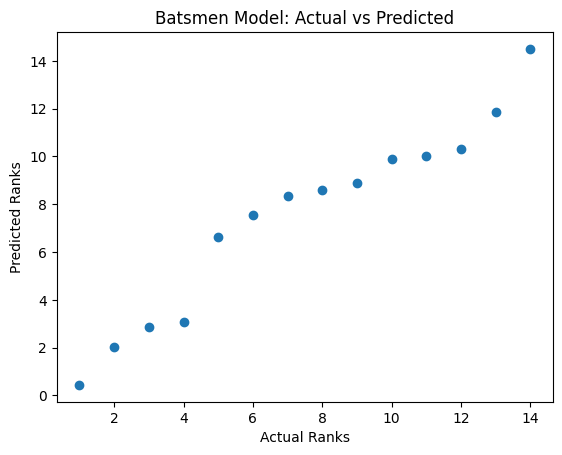

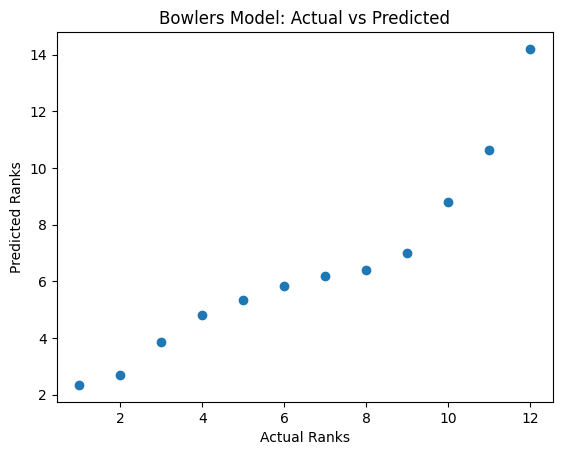

In [ ]:
import matplotlib.pyplot as plt

# Plot for batsmen model
plt.scatter(y_batsmen, batsmen_predictions)
plt.title("Batsmen Model: Actual vs Predicted")
plt.xlabel("Actual Ranks")
plt.ylabel("Predicted Ranks")
plt.show()

# Plot for bowlers model
plt.scatter(y_bowlers, bowlers_predictions)
plt.title("Bowlers Model: Actual vs Predicted")
plt.xlabel("Actual Ranks")
plt.ylabel("Predicted Ranks")
plt.show()